# k-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## k-Neighbors classification

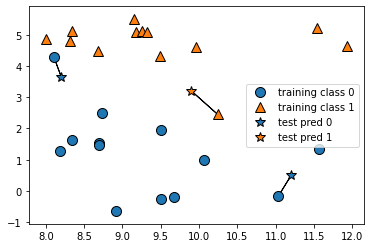

In [2]:
from helpers import plot_knn_classification

plot_knn_classification.plot_knn_classification(n_neighbors=1)

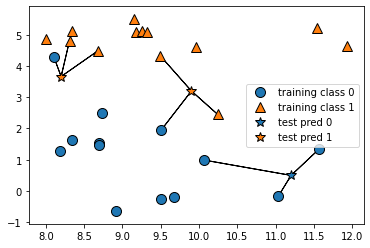

In [3]:
plot_knn_classification.plot_knn_classification(n_neighbors=3)

In [4]:
import helpers
from sklearn.model_selection import train_test_split

X, y = helpers.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
X,y

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [12]:
clf.score(X_test, y_test)

0.8571428571428571

### Analyzing KNeighborsClassifier

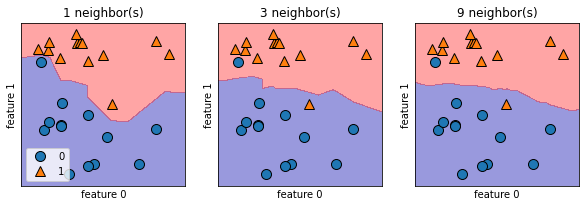

In [13]:
from helpers.plot_2d_separator import plot_2d_separator
from helpers.tools import discrete_scatter

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

    axes[0].legend(loc=3)

- Več sosedov -> bolj enostaven model
- Manj sosedov -> kompleksnejši model

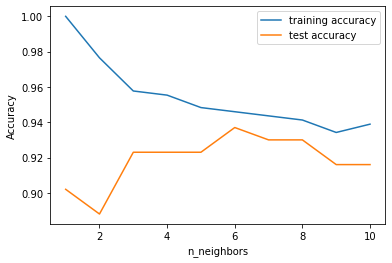

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)


for n_neighbor in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbor)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## k-neighbors regression

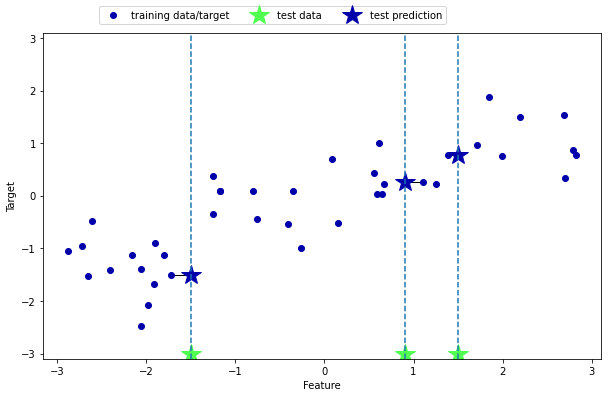

In [15]:
from helpers import plot_knn_regression

plot_knn_regression.plot_knn_regression(n_neighbors=1)
plt.show()

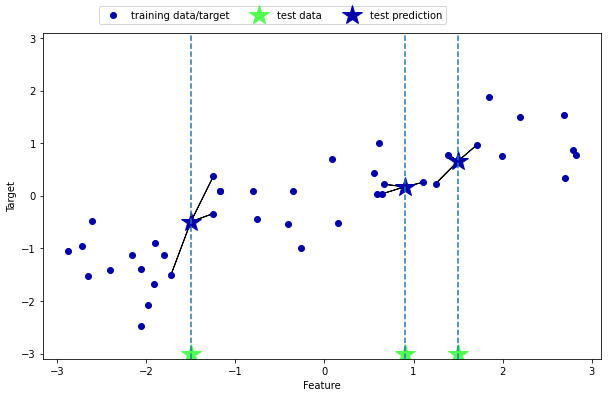

In [16]:
plot_knn_regression.plot_knn_regression(n_neighbors=3)
plt.show()

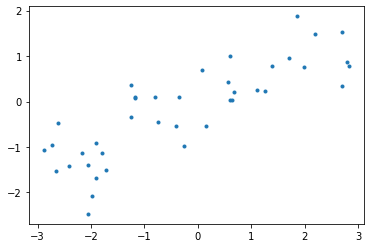

In [17]:
import helpers
from sklearn.neighbors import KNeighborsRegressor

X, y = helpers.datasets.make_wave(n_samples=40)


plt.plot(X,y, ".")
plt.show()

In [18]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
print(X_test)

[[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]


In [20]:
print(f"Test set predictions:\n{reg.predict(X_test)}")

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")

Test set R^2: 0.83


### Analyzing KNeighborsRegressor

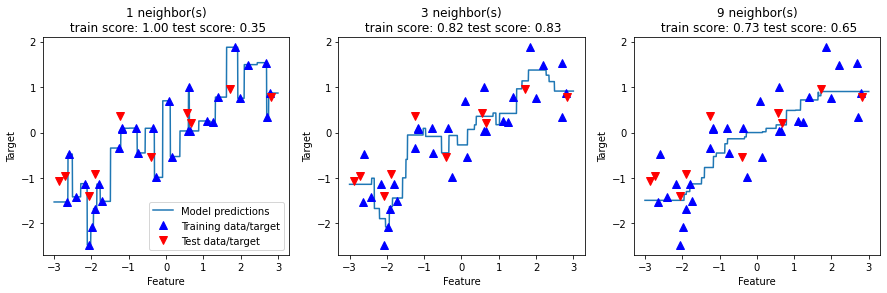

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c="blue", markersize=8)
    ax.plot(X_test, y_test, 'v', c="red", markersize=8)
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

### Primer: AirBnB dataset

In [23]:
dc_listings = pd.read_csv("data/dc_airbnb.csv")
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [24]:
# price data
stripped_commas = dc_listings['price'].str.replace(',', '', regex=False)
stripped_dollar_sign = stripped_commas.str.replace('$', '', regex=False)
dc_listings['price'] = stripped_dollar_sign.astype('float')


# dropping columns 
drop_columns = ['room_type', 'city', 'state', 'latitude', 
                'longitude', 'zipcode', 'host_response_rate', 
                'host_acceptance_rate', 'host_listings_count',
                'cleaning_fee', 'security_deposit']

dc_listings.drop(drop_columns, axis=1, inplace=True)
dc_listings = dc_listings.dropna(axis=0)

In [25]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4,1.0,1.0,2.0,160.0,1,1125,0
1,6,3.0,3.0,3.0,350.0,2,30,65
2,1,1.0,2.0,1.0,50.0,2,1125,1
3,2,1.0,1.0,1.0,95.0,1,1125,0
4,4,1.0,1.0,1.0,50.0,7,1125,0


In [26]:
# preverimo če dataset vsebuje manjkajoče vrednosti
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [29]:
features = dc_listings.columns.tolist()
features.remove("price")

X = dc_listings[features].values
y = dc_listings["price"].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train.shape

(2936, 7)

In [67]:
X_test.shape

(735, 7)

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [70]:
knn.score(X_test, y_test)

0.37026592234923583

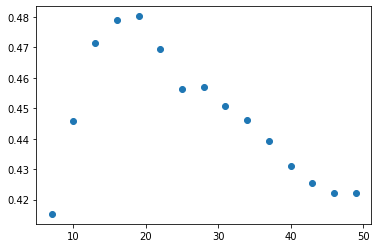

In [71]:
hyper_params = list(range(7,50,3))
scores = {}

for n_neighbors in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores[n_neighbors] = score
    
plt.scatter(x=scores.keys(), y=scores.values())
plt.show()

## Parameters

## Strengths

## Weaknesses

## Conclusion